Akurasi: 1.00


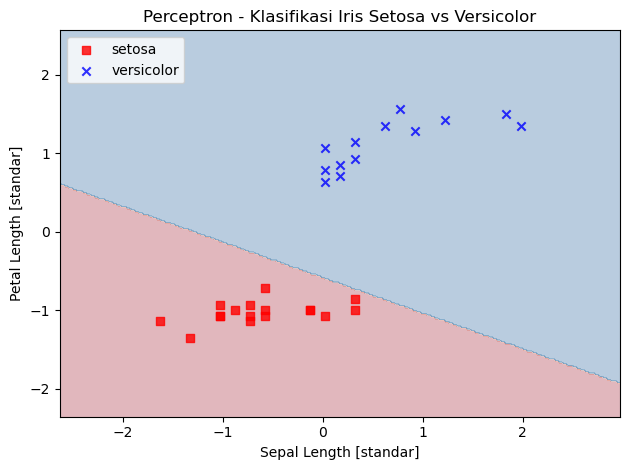

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # Menggunakan fitur sepal length dan petal length
y = iris.target

# Memilih dua kelas: Setosa dan Versicolor
X = X[y != 2]
y = y[y != 2]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Inisialisasi dan pelatihan model Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)

# Prediksi dan evaluasi
y_pred = ppn.predict(X_test_std)
print(f'Akurasi: {accuracy_score(y_test, y_pred):.2f}')

# Visualisasi hasil klasifikasi
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Menyiapkan marker dan warna
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdBu

    # Menentukan batas-batas plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Prediksi kelas untuk setiap titik dalam grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot kontur dan sampel
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot sampel data
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl])

# Plot hasil
plot_decision_regions(X_test_std, y_test, classifier=ppn)
plt.xlabel('Sepal Length [standar]')
plt.ylabel('Petal Length [standar]')
plt.legend(loc='upper left')
plt.title('Perceptron - Klasifikasi Iris Setosa vs Versicolor')
plt.tight_layout()
plt.show()
